The commented out code in this notebook is here because without that an OOM would be thrown. However, it has to stay, to be able to calculate the resampled steps per epoch.

In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_oversampling_only'

In [3]:
BATCH_SIZE = 32
balanced_train_dataset, class_names = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
num_classes = len(class_names)
# balanced_train_dataset_non_repeating = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE, do_repeat=False)

Found 8015 files belonging to 7 classes.


In [4]:
# all_labels = []
#
# for images, labels in balanced_train_dataset_non_repeating:
#     all_labels.append(labels.numpy())
#
# all_labels = np.concatenate(all_labels)
# class_counts = np.sum(all_labels, axis=0)

In [5]:
# mean_class_count = np.mean(class_counts)
mean_class_count = 6783.4287
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
283/283 [==============================] - ETA: 0s - loss: 1.1531 - categorical cross entropy: 1.1531 - mean squared error: 0.0717 - accuracy: 0.6729 - auc: 0.7520 - prc: 0.2560

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_1\assets


283/283 [==============================] - 148s 355ms/step - loss: 1.1531 - categorical cross entropy: 1.1531 - mean squared error: 0.0717 - accuracy: 0.6729 - auc: 0.7520 - prc: 0.2560 - val_loss: 0.9664 - val_categorical cross entropy: 0.9664 - val_mean squared error: 0.0644 - val_accuracy: 0.6500 - val_auc: 0.8374 - val_prc: 0.3718 - lr: 0.0010
Epoch 2/100
283/283 [==============================] - ETA: 0s - loss: 0.7117 - categorical cross entropy: 0.7117 - mean squared error: 0.0496 - accuracy: 0.7470 - auc: 0.9026 - prc: 0.4873

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_2\assets


283/283 [==============================] - 101s 356ms/step - loss: 0.7117 - categorical cross entropy: 0.7117 - mean squared error: 0.0496 - accuracy: 0.7470 - auc: 0.9026 - prc: 0.4873 - val_loss: 0.7338 - val_categorical cross entropy: 0.7338 - val_mean squared error: 0.0521 - val_accuracy: 0.7340 - val_auc: 0.9052 - val_prc: 0.5443 - lr: 0.0010
Epoch 3/100
283/283 [==============================] - 83s 294ms/step - loss: 0.6279 - categorical cross entropy: 0.6279 - mean squared error: 0.0442 - accuracy: 0.7765 - auc: 0.9210 - prc: 0.5657 - val_loss: 27.6121 - val_categorical cross entropy: 27.6121 - val_mean squared error: 0.0560 - val_accuracy: 0.7430 - val_auc: 0.8019 - val_prc: 0.4850 - lr: 0.0010
Epoch 4/100
283/283 [==============================] - 81s 288ms/step - loss: 0.6343 - categorical cross entropy: 0.6343 - mean squared error: 0.0431 - accuracy: 0.7858 - auc: 0.9209 - prc: 0.5834 - val_loss: 1.0874 - val_categorical cross entropy: 1.0874 - val_mean squared error: 0.049

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_5\assets


283/283 [==============================] - 99s 349ms/step - loss: 0.6082 - categorical cross entropy: 0.6082 - mean squared error: 0.0426 - accuracy: 0.7890 - auc: 0.9277 - prc: 0.6104 - val_loss: 0.6497 - val_categorical cross entropy: 0.6497 - val_mean squared error: 0.0456 - val_accuracy: 0.7770 - val_auc: 0.9219 - val_prc: 0.6494 - lr: 0.0010
Epoch 6/100
283/283 [==============================] - ETA: 0s - loss: 0.5328 - categorical cross entropy: 0.5328 - mean squared error: 0.0379 - accuracy: 0.8129 - auc: 0.9461 - prc: 0.6919

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_6\assets


283/283 [==============================] - 98s 347ms/step - loss: 0.5328 - categorical cross entropy: 0.5328 - mean squared error: 0.0379 - accuracy: 0.8129 - auc: 0.9461 - prc: 0.6919 - val_loss: 0.6492 - val_categorical cross entropy: 0.6492 - val_mean squared error: 0.0461 - val_accuracy: 0.7745 - val_auc: 0.9251 - val_prc: 0.6708 - lr: 0.0010
Epoch 7/100
283/283 [==============================] - 86s 304ms/step - loss: 0.5048 - categorical cross entropy: 0.5048 - mean squared error: 0.0366 - accuracy: 0.8193 - auc: 0.9548 - prc: 0.7329 - val_loss: 0.6598 - val_categorical cross entropy: 0.6598 - val_mean squared error: 0.0441 - val_accuracy: 0.7835 - val_auc: 0.9144 - val_prc: 0.6803 - lr: 0.0010
Epoch 8/100
283/283 [==============================] - ETA: 0s - loss: 0.4719 - categorical cross entropy: 0.4719 - mean squared error: 0.0345 - accuracy: 0.8324 - auc: 0.9577 - prc: 0.7466

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_8\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_1_8\assets


283/283 [==============================] - 99s 351ms/step - loss: 0.4719 - categorical cross entropy: 0.4719 - mean squared error: 0.0345 - accuracy: 0.8324 - auc: 0.9577 - prc: 0.7466 - val_loss: 0.5828 - val_categorical cross entropy: 0.5828 - val_mean squared error: 0.0398 - val_accuracy: 0.8085 - val_auc: 0.9179 - val_prc: 0.7057 - lr: 0.0010
Epoch 9/100
283/283 [==============================] - 91s 319ms/step - loss: 0.4602 - categorical cross entropy: 0.4602 - mean squared error: 0.0338 - accuracy: 0.8323 - auc: 0.9595 - prc: 0.7809 - val_loss: 0.6073 - val_categorical cross entropy: 0.6073 - val_mean squared error: 0.0428 - val_accuracy: 0.7870 - val_auc: 0.9222 - val_prc: 0.6652 - lr: 0.0010
Epoch 10/100
283/283 [==============================] - 88s 311ms/step - loss: 0.4309 - categorical cross entropy: 0.4309 - mean squared error: 0.0319 - accuracy: 0.8446 - auc: 0.9646 - prc: 0.8099 - val_loss: 0.7237 - val_categorical cross entropy: 0.7237 - val_mean squared error: 0.0448 

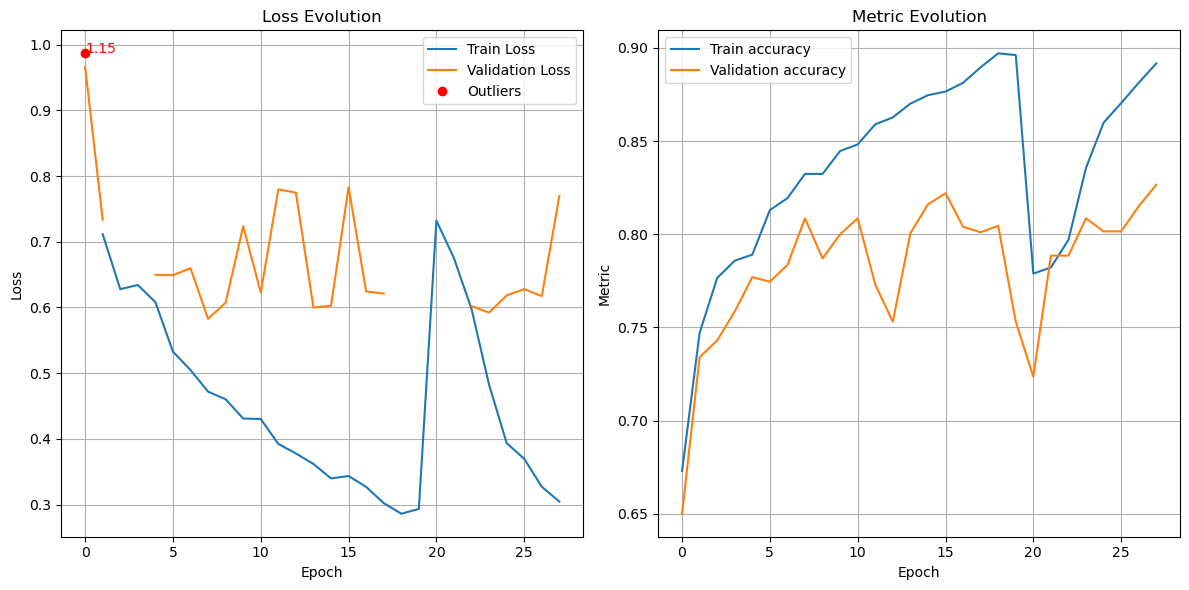

(<keras.engine.functional.Functional at 0x20bd8d001f0>,
 <keras.callbacks.History at 0x20bd8d6c130>)

In [7]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers,
    num_classes,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)